### Regression | Data exploration using boston housing dataset

**The Boston Housing Dataset:** is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

- CRIM - per capita crime rate by town
- ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - average number of rooms per dwelling
...
- (The target variable) MEDV - Median value of owner-occupied homes in thousand of dolares.

In [70]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pandas import read_csv

In [71]:
boston = pd.read_csv('Boston.csv')
print(boston.head())

   Unnamed: 0     crim    zn  indus  chas    nox     rm   age     dis  rad  \
0           1  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1           2  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2           3  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3           4  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4           5  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio   black  lstat  medv  
0  296     15.3  396.90   4.98  24.0  
1  242     17.8  396.90   9.14  21.6  
2  242     17.8  392.83   4.03  34.7  
3  222     18.7  394.63   2.94  33.4  
4  222     18.7  396.90   5.33  36.2  


**Creating features and target values**

We split our DataFrame: in the first line, que drop the target, and in the second we keep only the target.

In [72]:
X = boston.drop('medv', axis = 1).values
y = boston['medv'].values

As a first task, let's try to predict the price from a single feature: the average number of rooms in a block. To do this, we slice out the number of rooms column of the DataFrame `X`, which is the fifth column into the variable `X_rooms`.

In [73]:
X_rooms = X[:,5]
type(X_rooms), type(y)

(numpy.ndarray, numpy.ndarray)

In [74]:
# To turn them to NumPy arrays of the desire shape, we apply reshape method to keep the first dimension, 
# but add another dimension of size one to X
y = y.reshape(-1,1)
X_rooms = X_rooms.reshape(-1,1)

Now let's plot house value as functions of the number of rooms using matplot lib.

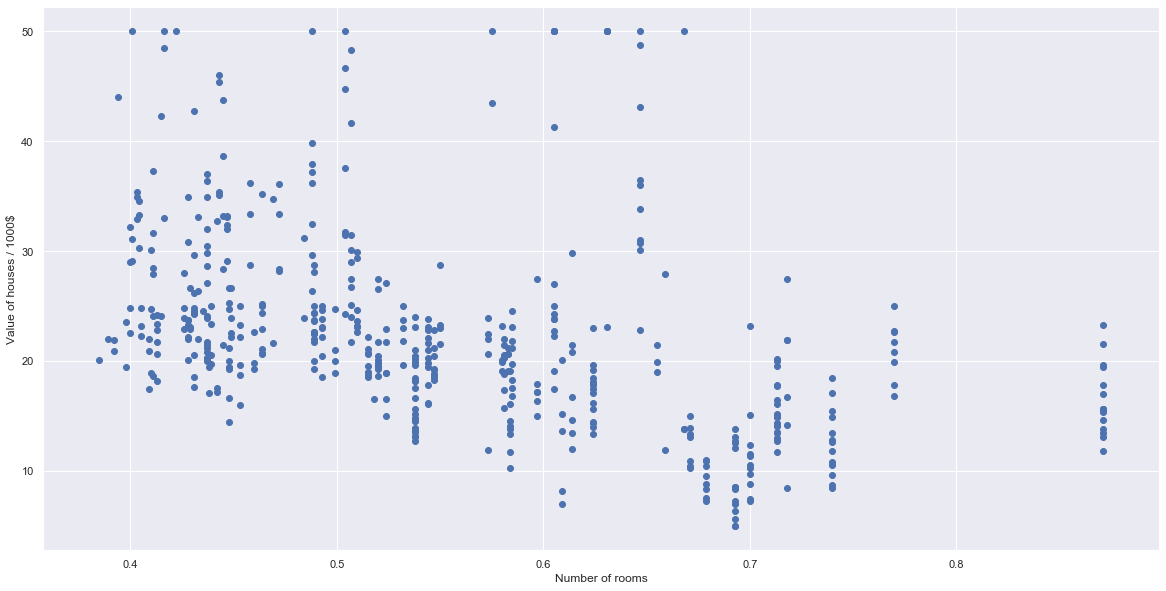

In [75]:
plt.scatter(X_rooms, y)
plt.ylabel('Value of houses / 1000$')
plt.xlabel('Number of rooms')
# plt.rcParams["figure.figsize"] = (20,10)
plt.show()

# We can immediately see that, as one might expect, more rooms lead to higher prices. 

**Fitting a regression model**

In [76]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_rooms, y)

#We want to check out the regressions predictions over the range of the data 
prediction_space = np.linspace(min(X_rooms), max(X_rooms)).reshape(-1,1)

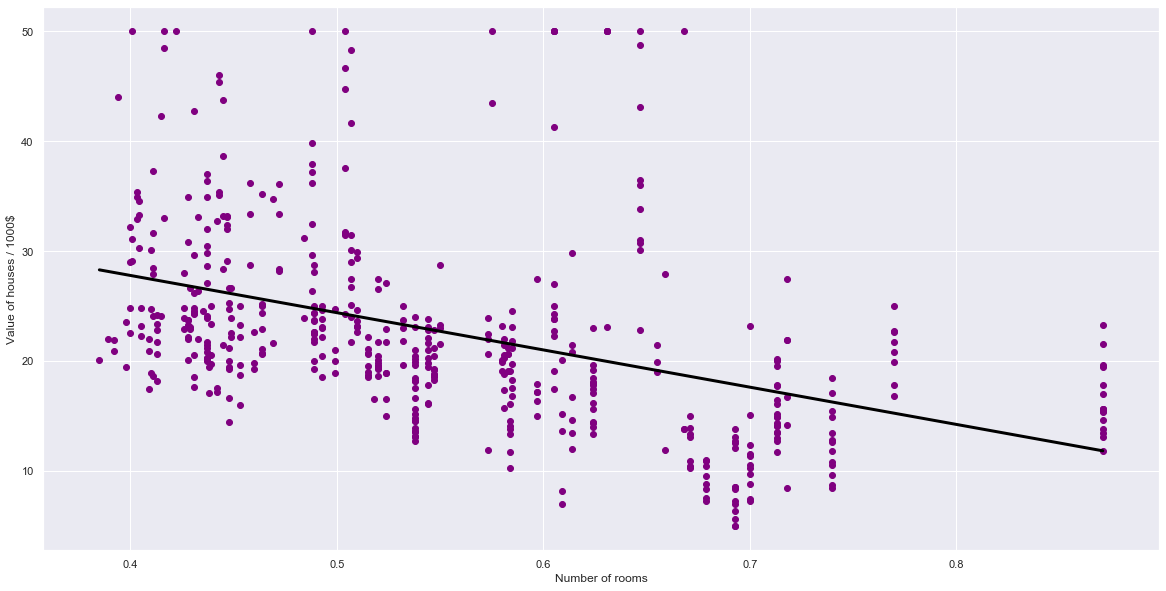

In [77]:
plt.scatter(X_rooms, y, color = 'purple')
plt.ylabel('Value of houses / 1000$')
plt.xlabel('Number of rooms')
plt.plot(prediction_space, reg.predict(prediction_space), color = 'black', linewidth = 3)
plt.show()

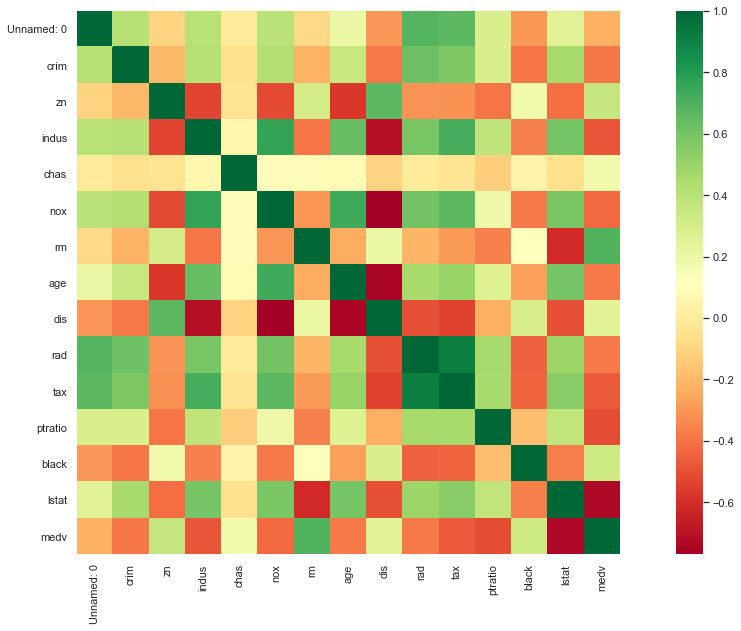

In [78]:
import seaborn as sns; sns.set()

# The heatmap was generated using Seaborn's heatmap function and 
# the following line of code, where df.corr() computes the pairwise correlation between columns

sns.heatmap(boston.corr(), square=True, cmap='RdYlGn')

**The Basics of Linear Regression**

**Regression mechanics:**
- y = ax + b
    - y = target
    - x = single feature
    - a, b = parameters of model

The question of fitting is to: How do we choose __a__ and __b__? A commom method is to define an error function for any given line and the choose the line that minimizes the error function. Such an error function is also called a __loss__ or a __cost function__.

What will our loss function be? We want the line to be as close to the actual data point as possible. For this reason, we wish to minimize the vertical distance between the fit and the data. So, we calculate residuals and we minimize the sum of the square of the residuals. This is will be out loss function and using this loss function is commonly called [Ordinary Least Square (OLS)](https://setosa.io/ev/ordinary-least-squares-regression/). Use OLS is the same as minimizing the mean squared error of the predictions on the training set.

When we call `fit` on a linear regression model in scikit-learn, it performs this OLS under the hood.

**Linear Regression on all features**


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
reg_all = LinearRegression()
reg_all.fit(X_train, y_train)
y_pred = reg_all.predict(X_test)

#Accuracy
reg_all.score(X_test, y_test)

0.7051609808903437